In [1]:
import os
import numpy as np
from PIL import Image

# DATASET

In [2]:
eyewear_encode = {'open': 0, "sunglasses":1}

In [3]:
# Training Data
train_files =list(map(lambda x: os.path.join("TrainingSet/",x ),os.listdir("TrainingSet")))

X_train = []
y_train = []

for i in train_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_train.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_train.append(m)
        
# Test Data
test_files =list(map(lambda x: os.path.join("TestSet/",x ), os.listdir("TestSet/")))

X_test = []
y_test = []

for i in test_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_test.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_test.append(m)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test

array([[38, 37, 36, ...,  1,  0,  1],
       [37, 36, 36, ...,  0,  0,  0],
       [37, 36, 36, ...,  0,  0,  1],
       ...,
       [40, 40, 39, ...,  1,  0,  3],
       [37, 38, 38, ...,  2,  0,  0],
       [40, 40, 39, ...,  3,  0,  2]], dtype=uint8)

# DECISION TREE

## part a

In [4]:
from sklearn.tree import DecisionTreeClassifier           #importing the Decision tree classifier for the supervised classification
from sklearn.metrics import accuracy_score, f1_score      #importing the measurements metrics to check the classifier performance

In [5]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=0)      #decision tree classifier with depth of 2 and0 randomness
decision_tree.fit(X_train, y_train)                                      #training the classifier using x train and y training label

pred_train = decision_tree.predict(X_train)                              #predicting the labels for x training set
pred_test = decision_tree.predict(X_test)                                #predicting the labels for x testing set




In [6]:

train_acc = accuracy_score(pred_train,y_train)                          #decision tree model train accuracy
test_acc = accuracy_score(pred_test,y_test)                             #decision tree model test accuracy


In [7]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.7111111111111111
0.45555555555555555


## part b

__Did your model performs well? Is bias low or high? What about variance?__

It performed poorly as it has a relativly low bias as well as low variance. the model underfitting the data

# BAGGING MODELS

## part c

In [8]:
from sklearn.ensemble import BaggingClassifier
bagging_clf1 = BaggingClassifier(DecisionTreeClassifier(max_depth=2,random_state=0), max_features=40, bootstrap=False, bootstrap_features=False, random_state=0)
#builidng the bagging classifier to diverse the modeling set  with decision tree depth 2 as the model using 0 features without replacing using entire dataset sample

C:\Users\Hebasaleh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## part d

In [9]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib is used to plot graphs

In [10]:
# PLOT
accuracy_test=[]                                                    #a testing accuracy list to save the results
for i in range(1,40):
    bagging_clf1.n_estimators=i                                     #  To increase the number of classifiers from 1 until 40 gradually
    bagging_clf1.fit(X_train, y_train)                              #training the model usinnf Xtrain
    y_pred = bagging_clf1.predict(X_test)                           #predicting the label for x test 
    accuracy_test.append( accuracy_score(y_test, y_pred) )          #finding the classifier accuracy using the predicted labels from the bagging decision tree model

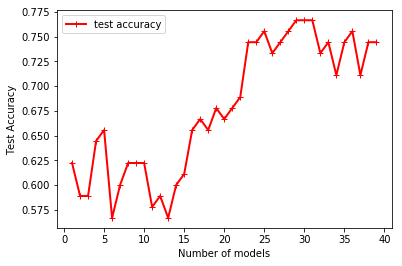

In [11]:
fig, ax = plt.subplots()                                                            # set a plot

ax.plot(range(1,40),accuracy_test, "r-+", linewidth=2, label="test accuracy")       # Ploting the accuracy test list vs number of models from 1 to 40  using red r-+
ax.legend()
ax.set_ylabel("Test Accuracy")                                                      #x axis label
ax.set_xlabel("Number of models")                                                   #y axis label
plt.show()                                                                          #plot


In [12]:
maximum=0                                                                       #storing the maximum acuuracy test value
for i,value in enumerate(accuracy_test):                                        #find the latest maximum accuracy test value
    if value>maximum:
        maximum=value
    if value == maximum:
        maximum=value
        index=i+1                                                              #return an index with +1 as arrays starts with 0 usually not 1
print("best number of models ",index,"with best accuracy test of",maximum)


best number of models  31 with best accuracy test of 0.7666666666666667


## part e

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model  which has the best number of models.__

best number of models  31 with best accuracy test of 0.7666666666666667


In [13]:
    #the ensembelled classifier using 31 classifier , training  the modetl and testing its performance
    bagging_best_estimator_clf1 = BaggingClassifier(DecisionTreeClassifier(max_depth=2,random_state=0),n_estimators=index,max_features=40, bootstrap=False, random_state=0)
    bagging_best_estimator_clf1.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, bagging_best_estimator_clf1.predict(X_train))
    test_acc =accuracy_score(y_test, bagging_best_estimator_clf1.predict(X_test))

In [14]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9111111111111111
0.7666666666666667


## part f

__Compare the decision tree classifier in part a and best bagging classifier in part e in terms of accuracy, bias, and variance.__

Part e
training accuracy 0.9111111111111111..... training error is 0.089
testing accuracy 0.7666666666666667...... testing error is 0.233

Part a
training accuracy 0.7111111111111111..... training error is 0.2889
testing accuracy 0.45555555555555555...... testing error is 0.54445

The e model has a higher training and relatively high but good testing accuracies compared to part a, therefore model e has a Low bias (training error is low as well as testing error is low), while lower variance as well. The best bagging classifier with 31 classifier preforms better than decision tree classifier. part f did not overfit the data while in part a classifier it over fitted due to its high testing error and low training error it has a high variance

## part g

In [15]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2,random_state=0),max_samples = 1.0, max_features=40, random_state=0)
#building an ensembly model with decision tree, sampling the training instances with replacement as well as sampling the features without replacement (it is setted by default) 

## part h

In [16]:
# PLOT
accuracy_test2=[]                                               #list storing model of accuracy 
for i in range(1,40):                                           # finding accuracy as  number of models increases
    bagging_clf2.n_estimators=i  
    bagging_clf2.fit(X_train, y_train)
    y_pred = bagging_clf2.predict(X_test)
    accuracy_test2.append( accuracy_score(y_test, y_pred) )

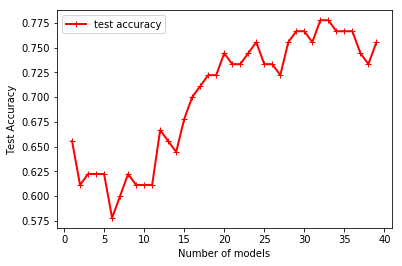

In [17]:
fig, ax = plt.subplots()                                                             #plotting the graph of aurracy vs number of models

ax.plot(range(1,40),accuracy_test2, "r-+", linewidth=2, label="test accuracy")
ax.legend()
ax.set_ylabel("Test Accuracy")
ax.set_xlabel("Number of models")
plt.show()

In [18]:
print(accuracy_test2)

[0.6555555555555556, 0.6111111111111112, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.5777777777777777, 0.6, 0.6222222222222222, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.6666666666666666, 0.6555555555555556, 0.6444444444444445, 0.6777777777777778, 0.7, 0.7111111111111111, 0.7222222222222222, 0.7222222222222222, 0.7444444444444445, 0.7333333333333333, 0.7333333333333333, 0.7444444444444445, 0.7555555555555555, 0.7333333333333333, 0.7333333333333333, 0.7222222222222222, 0.7555555555555555, 0.7666666666666667, 0.7666666666666667, 0.7555555555555555, 0.7777777777777778, 0.7777777777777778, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7444444444444445, 0.7333333333333333, 0.7555555555555555]


In [19]:
maximum=0                                                                            #finding the best number of models required for the highest accuracy
for i,value in enumerate(accuracy_test2):
    if value>maximum:
        maximum=value                             #if the value in testing acciracy more than stored max then replace max this is repeated until the maximum value is found
    if value == maximum:
        maximum=value
        index=i+1
print("best number of models ",index,"with best accuracy test of",maximum)

best number of models  33 with best accuracy test of 0.7777777777777778


## part i

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model which has the best number of models.__

best number of models  33 with best accuracy test of 0.7777777777777778

In [20]:
 #the ensembelled classifier using 33 classifier , training  the modetl and testing its performance

bagging_best_estimator_clf2= BaggingClassifier(DecisionTreeClassifier(max_depth=2,random_state=0),n_estimators=index, bootstrap=True, bootstrap_features=False,max_features=40, max_samples = 1.0, random_state=0)
bagging_best_estimator_clf2.fit(X_train, y_train)
train_acc = accuracy_score(y_train, bagging_best_estimator_clf2.predict(X_train))
test_acc =accuracy_score(y_test, bagging_best_estimator_clf2.predict(X_test))


In [21]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9238095238095239
0.7777777777777778


## part j

__Compare the decision tree classifier in part a and best bagging classifier in part i in terms of accuracy, bias, and variance.__

Part i
training accuracy 0.9238095238095239..... training error is 0.07619
testing accuracy 0.7777777777777778...... testing error is 0.222

Part a
training accuracy 0.7111111111111111..... training error is 0.2889
testing accuracy 0.45555555555555555...... testing error is 0.54445

The i model has a higher training and testing accuracies compared to part a, therefor model i has a Low bias (training error  and testing are as well as testing error is low), while lower variance as the testing error is low. The best bagging classifier with 31 classifier preforms better than decision tree classifier. part i did not overfit the data while in part a classifier it over fitted due to its high testing error and low training error it has a high variance

## part k

__Compare two bagging models that you found in part e and part i in terms of accuracy, bias, and variance.__

Part i
training accuracy 0.9238095238095239..... training error is 0.07619
testing accuracy 0.7777777777777778...... testing error is 0.222

Part e
training accuracy 0.9111111111111111..... training error is 0.089
testing accuracy 0.7666666666666667...... testing error is 0.233

they are close however part i best classifier with max samples of 1 performed slightly better as it is lower biasing error  while part e had bias higher . as well as in variance error, part i had lower variance error 

## part l

__How sampling features and sampling instances affected the performance of your model? Why?__

Sampling improves the classifier model performance because as a small instances are collected from theentire data will lower the cost, thus increses the accuracy.Sampling features limits the area of operation thus will further increase the degree of accuracy, if we sampled it.

# BOOSTING MODELS

## part m

In [22]:
from sklearn.ensemble import AdaBoostClassifier

#Adjustable boosting classifier on the more difficult case putting more weight on them.
adaboost_clf  = AdaBoostClassifier( DecisionTreeClassifier(random_state=0,max_depth=2), random_state=0)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)

## part n

In [23]:
# PLOTting the training an dthe testing accuracy as we increse the number of mof=dels gradually to 50
train_accuracy=[]
test_accuracy=[]
for i in range(1,50):                                                  #for loop to increse models gradually
    adaboost_clf.n_estimators=i    
    adaboost_clf.fit(X_train, y_train)                                   # train the model with different number of estimator                                
    y_pred = adaboost_clf.predict(X_test)
    train_accuracy.append(accuracy_score(y_train,adaboost_clf.predict(X_train)))     #store the new trianing accuracy in the list
    test_accuracy.append( accuracy_score(y_test, y_pred) )                            #store the nre testing accuracy in the list

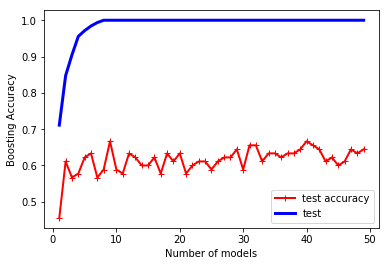

In [24]:
fig, ax = plt.subplots()
#Plotting the graph 
ax.plot(range(1,50),test_accuracy, "r-+", linewidth=2, label="test accuracy")
ax.plot(range(1,50), train_accuracy, "b-", linewidth=3, label="test")
ax.legend()
ax.set_ylabel("Boosting Accuracy")
ax.set_xlabel("Number of models")
plt.show()


## part o

In [25]:
maximum=0                                    
for i,value in enumerate(test_accuracy):                      #checking the varians error to Finding the best number of estimator that provide the best maximum accuracy
    if value>maximum:                                      #if the value in testing acciracy more than stored max then replace max this is repeated until the maximum value is found
        maximum=value
    if value == maximum:
        maximum=value
        index=i+1
print("best number of models would be dependent on the testing set to try and minimize overfitting the model therefore",index,"with testing accuracy of", maximum, "and training accuracy of ", train_accuracy[index-1])



best number of models would be dependent on the testing set to try and minimize overfitting the model therefore 40 with testing accuracy of 0.6666666666666666 and training accuracy of  1.0


__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Report train and test accuracy of the boosting model which has the best number of models.__

best number of models would be dependent on the testing set to try and minimize overfitting the model therefore 40 with testing accuracy of 0.6666666666666666 and training accuracy of  1.0

In [26]:
adaboost_clf.n_estimators =index
adaboost_clf.fit(X_train, y_train) 
train_acc = accuracy_score(y_train,adaboost_clf.predict(X_train)) 
test_acc = accuracy_score(y_test,adaboost_clf.predict(X_test)) 
#retrain the model with the best number of models and calculating its performance

In [27]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

1.0
0.6666666666666666


# STACKING

## part p

In [28]:
from sklearn.model_selection import train_test_split             #splitting the training and label sets
train_set_1, train_set_2, train_y_1, train_y_2 =train_test_split( X_train, y_train, test_size=0.5, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0, C= 0.001, solver='saga', penalty='l2').fit(train_set_1, train_y_1)    #creating a logistic regression model

from sklearn.svm import SVC
svc_clf = SVC(random_state= 0, C= 0.1, decision_function_shape= 'ovo', kernel= 'poly', tol= 0.0001, probability= True).fit(train_set_1, train_y_1)  #creating a svc model

C:\Users\Hebasaleh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
# DON'T REMOVE THIS CELL
print(sum(train_set_1))
print(sum(train_set_2))
print(sum(train_y_1))
print(sum(train_y_2))

[126 212  77 ... 231 145 182]
[ 72 133 179 ... 189  52 160]
76
82


## part q

In [31]:
import numpy as np                               
#making a probabilistic predictions on the train_set_2
log_clf_prob=log_clf.predict_proba(train_set_2)
svc_clf_prob=svc_clf.predict_proba(train_set_2)
new_train_set_2=np.array(len(log_clf_prob))
new_train_set_2=[(log_clf_prob[i][0], svc_clf_prob[i][0]) for i in range(len(log_clf_prob))]
new_train_set_2=np.asarray(new_train_set_2)

In [32]:
from sklearn.ensemble import RandomForestClassifier

blender = RandomForestClassifier(random_state=0,max_depth=1, n_estimators=10,max_features='auto') #Create a RandomForest classifier as a blender 
blender.fit(new_train_set_2, train_y_2)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
# DON'T REMOVE THIS CELL
print(sum(new_train_set_2))

[76.8927692  73.44946142]


In [34]:
len(new_train_set_2)

158

## part r

In [35]:
#probabilistic predictions of X_test using logistic regression and svc classifiers
log_clf_testprob = log_clf.predict_proba(X_test)
svc_clf_testprob = svc_clf.predict_proba(X_test)

new_test_set=[(log_clf_testprob[i][0], svc_clf_testprob[i][0]) for i in range(len(svc_clf_testprob))]
new_test_set=np.asarray(new_test_set)


In [36]:
#predicting the label using the andomForest blender classifier on new_test_set
y_test_pred = blender.predict(new_test_set)
test_acc =accuracy_score(y_test,y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


In [37]:
# DON'T REMOVE THIS CELL
print("\nTest Scores:")
print(test_acc)
print(test_f1)


Test Scores:
0.8111111111111111
0.7848101265822784


__Did stacking model perform well?__

Stacking model
training accuracy 0.8111111111111111..... training error is 0.1888888
testing accuracy 0.7848101265822784...... testing error is 0.215

both training and testing error are relativily low thus the model perform well, it does not overfit niether underfit  